<a href="https://colab.research.google.com/github/BenBlondeel-UCLL/Troy-ML/blob/master/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ex 15.8 Classification with the Iris Dataset: Hyperparameter Turning.

k=1 Mean accuracy: 0.96
k=2 Mean accuracy: 0.953
k=3 Mean accuracy: 0.967
k=4 Mean accuracy: 0.967
k=5 Mean accuracy: 0.967
k=6 Mean accuracy: 0.967
k=7 Mean accuracy: 0.967
k=8 Mean accuracy: 0.967
k=9 Mean accuracy: 0.973
k=10 Mean accuracy: 0.967
k=11 Mean accuracy: 0.967
k=12 Mean accuracy: 0.973
k=13 Mean accuracy: 0.98
k=14 Mean accuracy: 0.973
k=15 Mean accuracy: 0.973
k=16 Mean accuracy: 0.973
k=17 Mean accuracy: 0.973
k=18 Mean accuracy: 0.98
k=19 Mean accuracy: 0.973
k=20 Mean accuracy: 0.98
k=21 Mean accuracy: 0.967
k=22 Mean accuracy: 0.967
k=23 Mean accuracy: 0.973
k=24 Mean accuracy: 0.96
k=25 Mean accuracy: 0.967
k=26 Mean accuracy: 0.96
k=27 Mean accuracy: 0.967
k=28 Mean accuracy: 0.953
k=29 Mean accuracy: 0.953
k=30 Mean accuracy: 0.953


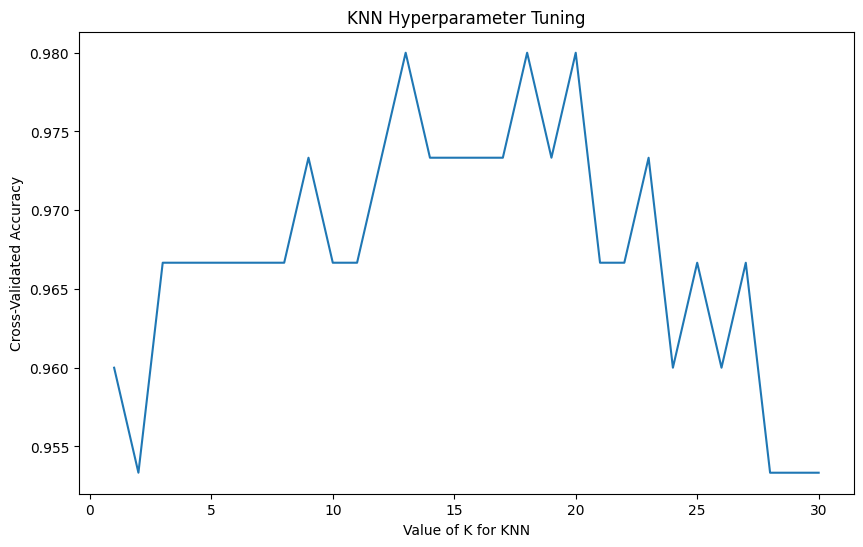

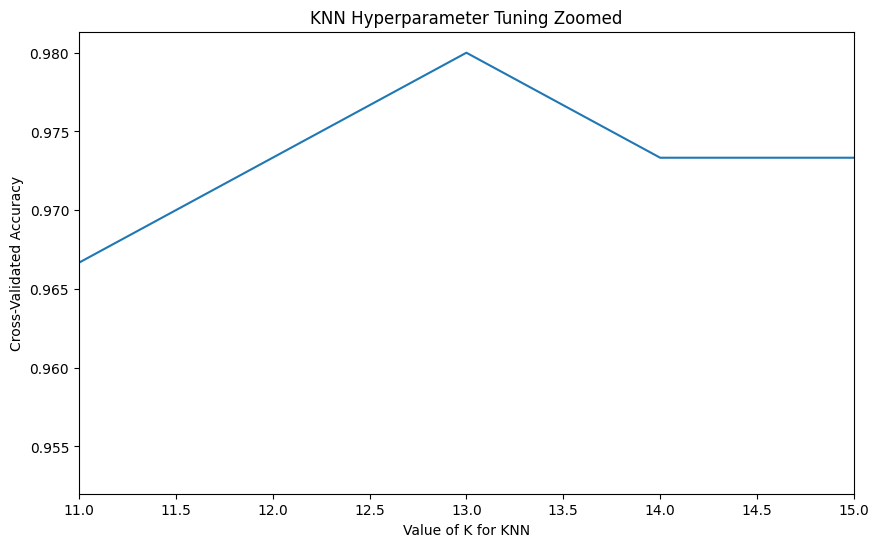

Best K value found using GridSearchCV: {'n_neighbors': 13}


In [6]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# 1. You can just load Iris dataset available in sklearn.datasets.
# Load the Iris dataset and splitting the label en features.
iris = load_iris()
X = iris.data
y = iris.target

# 2. Using scikit-learn's cross_val_score(cv=10) which means 10 fold cross-validation.
#Determine the optimal k value using cross-validation
k_range = range(1, 31)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)
    cv_scores.append(scores.mean())
    print("k=" + str(k) + " Mean accuracy: " + str(scores.mean().round(3)))

# 3. Determine the optimal k value (k range from 1 to 31) and plot  'Value of K
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Hyperparameter Tuning')
plt.show()
# From this we can clearly see that 13 is the best value.

# Zooming in on the plot.
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Hyperparameter Tuning Zoomed')
plt.xlim(11,15)
plt.show()


# 4. Use GridSearchCV to confirm k=13 has the optimal parameter.
param_grid = {'n_neighbors': np.arange(1, 31)}
knn = KNeighborsClassifier()
knn_gscv = GridSearchCV(knn, param_grid, cv=10)
knn_gscv.fit(X, y)

print("Best K value found using GridSearchCV:", knn_gscv.best_params_)